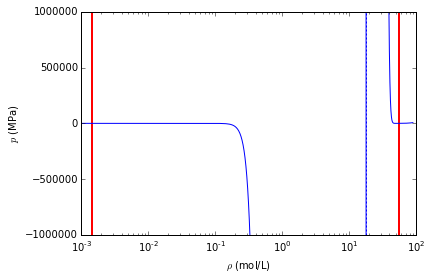

In [41]:
import CoolProp, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
AS = CoolProp.AbstractState('HEOS','Water')

T = 300
rhoc = AS.rhomolar_critical()

# Saturated liquid density
AS.update(CoolProp.QT_INPUTS, 0, T)
rhoL = AS.rhomolar()
plt.axvline(rhoL/1000.0,lw=2,c='r')
# Saturated vapor density
AS.update(CoolProp.QT_INPUTS, 1, T)
rhoV = AS.rhomolar()
plt.axvline(rhoV/1000.0,lw=2,c='r')

AS.specify_phase(CoolProp.iphase_liquid) # Something homogeneous to avoid flash call

plt.axvline(rhoc/1000.0,dashes = [2,2])
p = []
rho = np.linspace(1e0, rhoc*5, 10000)
for D in rho:
    AS.update(CoolProp.DmolarT_INPUTS, D, T)
    p.append(AS.p())
    
plt.plot(rho/1000.0,np.array(p)/1e6)
#plt.yscale('log')
plt.ylim(-1e6,10e5) # Undo this to see how crazy it is
plt.xscale('log')
plt.xlabel(r'$\rho$ (mol/L)')
lab = plt.ylabel(r'$p$ (MPa)')